In [4]:
import pandas as pd
import numpy as np
import os
print os.getcwd();

C:\Users\henrique\Desktop\Polytechnique\3rd year\Projet 3A


In [3]:
# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import libraries for features decomposition
from sklearn import decomposition

## Reading csv file

In [91]:
df = pd.read_csv('Dados.csv')

In [63]:
df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,DD2,TD3,+/-,PosicAbbrev
0,Aaron Brooks,CHI,31,69,36,33,1108,491,188,469,...,101,180,82,30,10,132,0,0,-10,PG
1,Aaron Gordon,ORL,20,78,32,46,1863,719,274,579,...,507,128,66,59,55,153,12,0,-76,PF
2,Aaron Harrison,CHA,21,21,15,6,93,18,5,19,...,15,2,4,6,0,10,0,0,-7,SG
3,Adreian Payne,MIN,25,52,18,34,486,132,53,145,...,111,29,36,16,11,77,0,0,-120,PF
4,Al Horford,ATL,30,82,48,34,2631,1249,529,1048,...,596,263,107,68,121,163,17,0,231,C


## Assign position label for each player

In [64]:
dict = {' PG': 1, ' PF': 2, ' SG' : 3, ' SF' : 4, ' C' : 5}

In [69]:
position_labels = [dict[x] for x in df['PosicAbbrev']]

## Building new dataframe with only numerical features

In [92]:
df2 = df.select_dtypes(include=['number'])

## Simple plot

### Plot 3D

In [81]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(df2)
reduced_df = pca.transform(df2)
pca.explained_variance_ratio_

array([ 0.89337242,  0.03855623,  0.02765456])

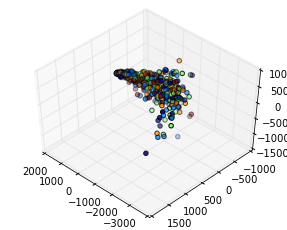

In [82]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=position_labels)

### Plot 2D

In [83]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(df2)
reduced_df_2 = pca.transform(df2)
pca.explained_variance_ratio_

array([ 0.89337242,  0.03855623])

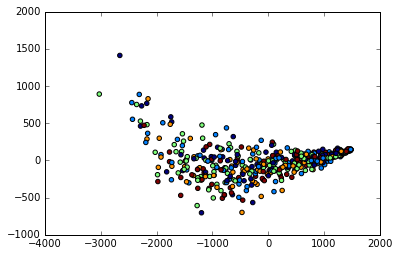

In [90]:
import pylab
pylab.scatter(reduced_df_2[:, 0], reduced_df[:, 1], c=position_labels)
pylab.show()

## Simple data analysis

## Building hierachical clustering model

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [17]:
# generate the linkage matrix
Z = linkage(df2, 'average')

In [18]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [19]:
# Cophenetic Correlation Coefficient:
# Compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering
# The closer the value is to 1, the better the clustering preserves the original distances
c, coph_dists = cophenet(Z, pdist(df2))
c

0.79062190899013363

In [20]:
X = np.array(df2.values.tolist())

## Ploting a dendogram

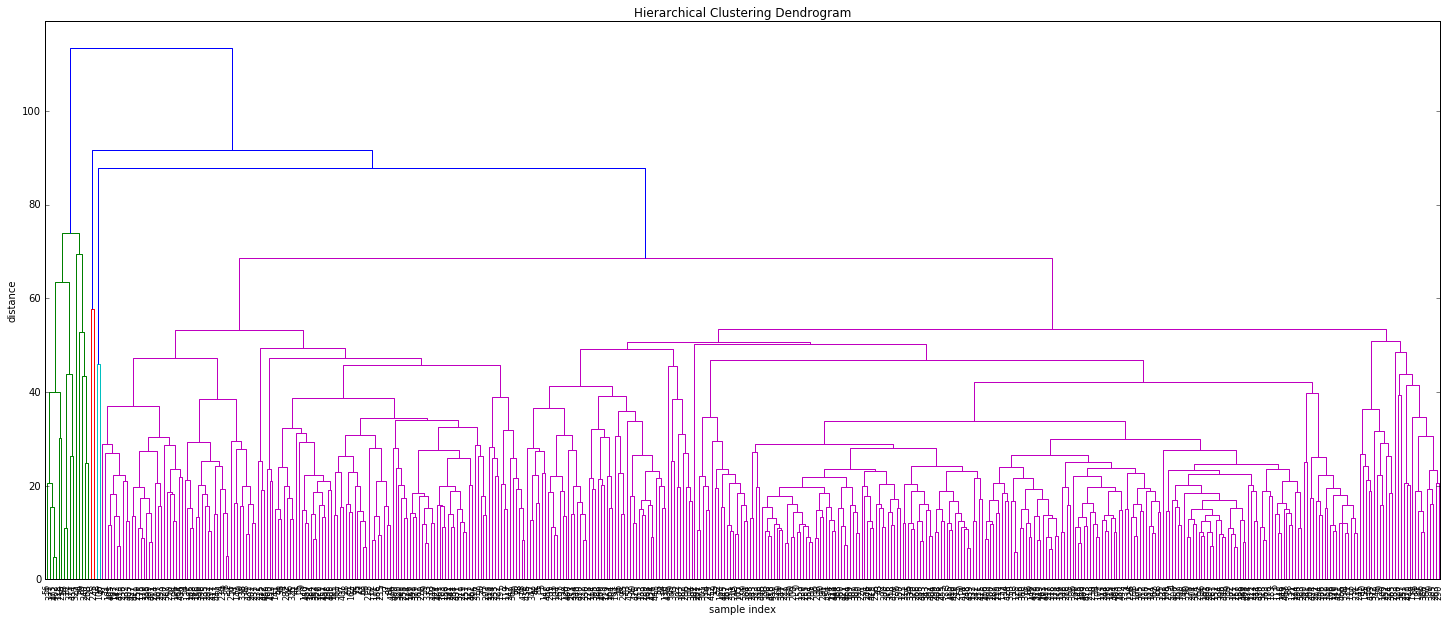

In [21]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()



In [22]:
Z[-9:,2]

array([  53.49815619,   57.80147057,   63.57932813,   68.71100729,
         69.49381064,   73.87379132,   87.89488717,   91.57343876,
        113.43965052])

## Plotting truncated dendogram

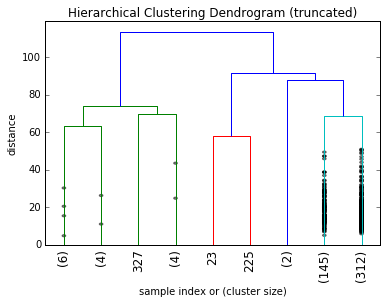

In [23]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=9,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [25]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata



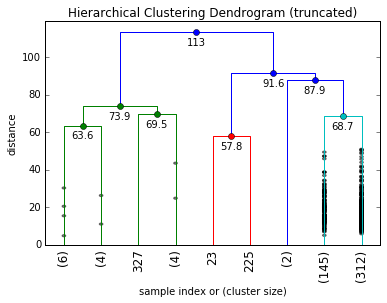

In [26]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=9,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

In [27]:
max_d = 54

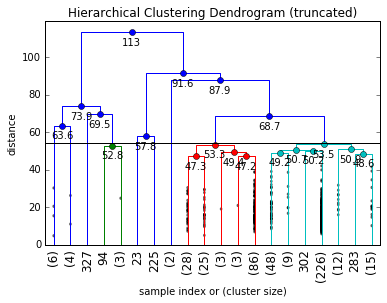

In [28]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [29]:
from scipy.cluster.hierarchy import fcluster
max_d = 35
clusters_labels = fcluster(Z, max_d, criterion='distance')
clusters_labels

array([32, 32, 22, 32, 32, 23, 32, 20, 15, 19, 36, 13, 24, 32, 32, 24, 26,
       23, 11, 31, 20, 26, 29,  9, 15, 32, 32, 20, 20, 37, 32, 32, 29, 27,
       32, 32, 32, 20, 32, 20, 27, 19, 23, 32, 34, 31, 19, 13, 16, 28, 32,
       19, 31, 20, 15, 36,  1,  3, 22, 32, 32, 20, 20, 20, 31, 19, 41, 20,
       32, 32, 16, 32, 32, 20, 19, 20, 32, 16, 22, 41, 22, 20,  3, 27, 27,
       23, 32, 15, 32,  6, 32, 14, 34, 32,  7, 41, 20, 20, 19, 31, 32, 32,
       32, 20, 24, 31, 12, 14, 32, 37, 21, 20, 32, 32, 25, 32, 32, 34, 32,
       22, 24, 32, 32, 32, 20, 32, 38, 20,  2, 25, 27, 32, 32, 27, 32, 15,
       15, 15, 32, 41, 19, 19, 13, 16, 32, 32, 32, 23, 32, 32, 32, 19, 32,
       32, 32, 36, 20, 32, 32, 32, 25, 13, 20, 31, 25, 15, 34, 31, 27, 32,
       34, 32, 34,  1, 32, 14, 32, 32, 32, 14, 32, 32, 29, 32, 19, 32, 20,
       41, 32, 20, 18, 22, 20, 32, 26, 20, 14, 13, 19, 32, 32, 31, 16, 32,
       32, 24, 34, 20, 32, 32, 32, 32, 20, 32, 14, 17,  2, 32, 32, 20, 14,
       32, 24, 32, 37, 10

## Ploting using PCA

In [30]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(df2)
reduced_df = pca.transform(df2)
pca.explained_variance_ratio_

array([ 0.51189229,  0.1445161 ,  0.11566013])

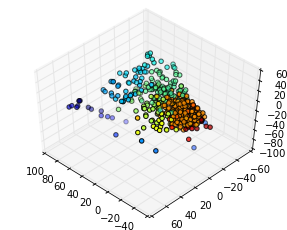

In [31]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=clusters_labels)

## Plot in 2D